<a href="https://colab.research.google.com/github/maurimendiluce/Clases-Mate2/blob/main/Biseccion_Newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resolución de Ecuaciones No Lineales

### Algoritmo de bisección
- El método de
bisección trata de hallar una solución aproximada basado en el Teorema de Bolzano: Dada una función $f$, dos números $a$, $b$, se trata de aproximar una raíz de f en el intervalo $[a, b]$ con un un número $n$ de
iteraciones del programa.

Ver Algoritmo 3.1 del apunte teórico (página 38) (es pseudo-codigo, no es código Python)

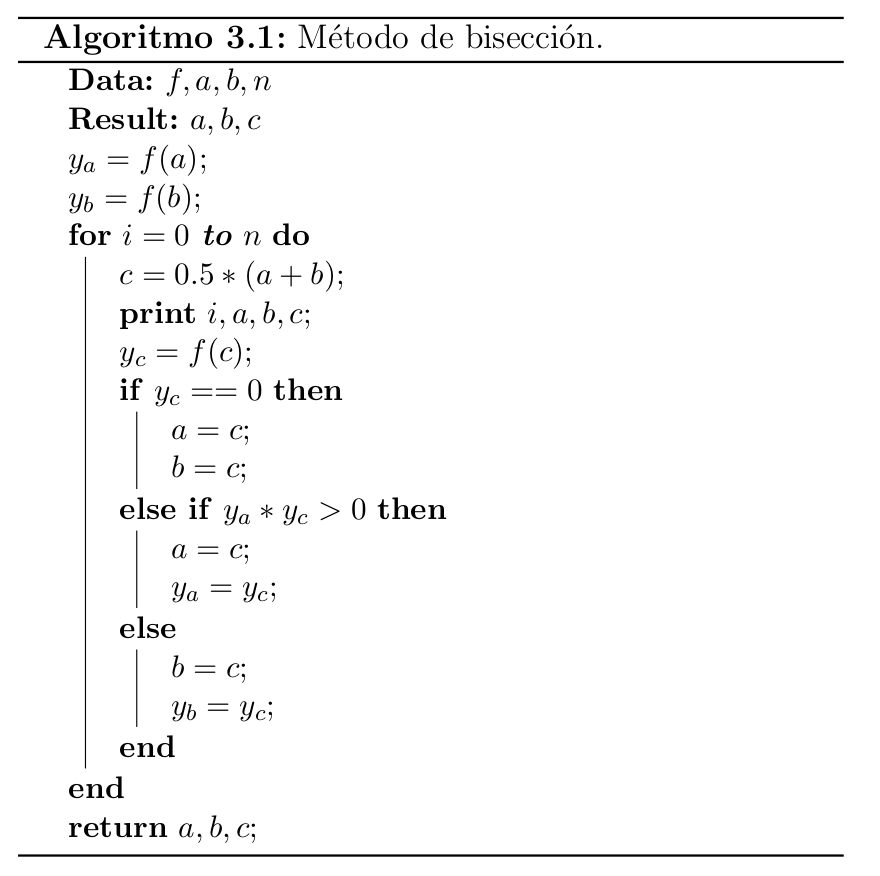

In [ ]:
import numpy as np
import math
import scipy
import matplotlib.pyplot as plt

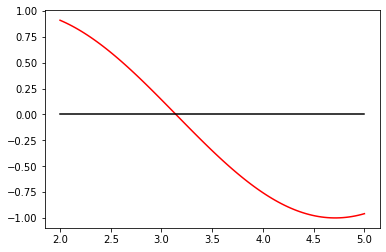

In [ ]:
# Ejemplo: Buscamos una raíz de sen(x) = 0 en el intervalo [3, 4]

# Recordemos su gráfico

def f(x):
    return(np.sin(x))
x = np.linspace(2,5,100)

ejex=np.zeros(len(x))
plt.plot(x,f(x),'r')
plt.plot(x,ejex,'k')




In [ ]:
#Código método de bisección

def bisecc(f, a, b, n):
    ya = f(a)
    yb = f(b)
    for i in range(0, n+1):
        c = 0.5 * (a+b)
        print (i, a, b, c)
        yc = f(c)
        if (yc == 0):
            a = c
            b = c
        elif (ya * yc > 0):
            a = c
            ya = yc
        else:
            b = c
            yb = yc
    return (a, b, c)



In [ ]:
# Usemos el método de Bisección 

r = bisecc(np.sin, 3, 4, 10)

print()
print("Pi = ", math.pi)

0 3 4 3.5
1 3 3.5 3.25
2 3 3.25 3.125
3 3.125 3.25 3.1875
4 3.125 3.1875 3.15625
5 3.125 3.15625 3.140625
6 3.140625 3.15625 3.1484375
7 3.140625 3.1484375 3.14453125
8 3.140625 3.14453125 3.142578125
9 3.140625 3.142578125 3.1416015625
10 3.140625 3.1416015625 3.14111328125

Pi =  3.141592653589793


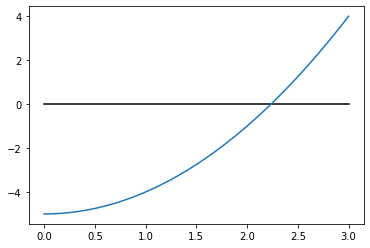

In [ ]:

def f(x):
    return(x**2-5)
x = np.linspace(0,3,100)

plt.plot(x,ejex,'k')
plt.plot(x, f(x))

In [ ]:
bisecc(f, 1, 3, 10)

**Ejemplo:** utilizar el programa anterior para encontrar una solución de 
$$
e^x = x^2 - 3
$$
en el intervalo $[-2, 2]$.

In [ ]:
def f(x):
    return(math.e**x-x**2+3)

out = bisecc(f, -2, 2, 20)

print(out)

0 -2 2 0.0
1 -2 0.0 -1.0
2 -2 -1.0 -1.5
3 -2 -1.5 -1.75
4 -2 -1.75 -1.875
5 -1.875 -1.75 -1.8125
6 -1.8125 -1.75 -1.78125
7 -1.78125 -1.75 -1.765625
8 -1.78125 -1.765625 -1.7734375
9 -1.78125 -1.7734375 -1.77734375
10 -1.78125 -1.77734375 -1.779296875
11 -1.78125 -1.779296875 -1.7802734375
12 -1.7802734375 -1.779296875 -1.77978515625
13 -1.7802734375 -1.77978515625 -1.780029296875
14 -1.7802734375 -1.780029296875 -1.7801513671875
15 -1.7801513671875 -1.780029296875 -1.78009033203125
16 -1.78009033203125 -1.780029296875 -1.780059814453125
17 -1.78009033203125 -1.780059814453125 -1.7800750732421875
18 -1.7800750732421875 -1.780059814453125 -1.7800674438476562
19 -1.7800674438476562 -1.780059814453125 -1.7800636291503906
20 -1.7800674438476562 -1.7800636291503906 -1.7800655364990234
(-1.7800655364990234, -1.7800636291503906, -1.7800655364990234)


In [ ]:
f(out[2])

-6.2185545890436345e-06

**Ejercicio:**  Modificar el programa anterior para que si no se cumple la condición inicial $f(a) f(b) < 0$, imprima un mensaje de error en ese caso. 

**Bisección pero con corte según una tolerancia:** Un código similar pero que termina cuando la longitud del intervalo $[a, b]$ sea menor que $10^{-t}$.

In [ ]:
def bisecT(f, a, b, t):
    ya = f(a)
    yb = f(b)
    i = 0
    while(abs(b-a)>=10**(-t)):
        c = 0.5 * (a+b)
        print (i, a, b, c)
        yc = f(c)
        if (yc == 0):
            a = c
            b = c
        elif (ya * yc > 0):
            a = c
            ya = yc
        else:
            b = c
            yb = yc
        i = i + 1
    return (a, b, c)
out = bisecT(f, -2, 2, 3)
            

0 -2 2 0.0
1 -2 0.0 -1.0
2 -2 -1.0 -1.5
3 -2 -1.5 -1.75
4 -2 -1.75 -1.875
5 -1.875 -1.75 -1.8125
6 -1.8125 -1.75 -1.78125
7 -1.78125 -1.75 -1.765625
8 -1.78125 -1.765625 -1.7734375
9 -1.78125 -1.7734375 -1.77734375
10 -1.78125 -1.77734375 -1.779296875
11 -1.78125 -1.779296875 -1.7802734375


**Ejercicio:** El mismo programa anterior para modificado que termine cuando el error relativo 
$$
\frac{|c_{n+1} - c_n|}{|c_n|}
$$ 
sea menor que $10^{-t}$.
sería así:

**¡PERO CUIDADO!:** Si algún término de la sucesión de lis $cn$ es cero, no funcionará. ¿
Qué podemos hacer para modificar el código para evitar el problema?

In [ ]:
def bisec_E(f, a, b, t):
    ya = f(a)
    yb = f(b)
    i = 0
    # Tomamos a a y b como los terminos iniciales de la sucesion, para que se cumpla la condicion del while.
    cTemp = a
    c = b
    while(abs((cTemp-c)/c)>=10**(-t)):       # Verificamos la condicion del enunciado
        cTemp = c            # Guardamos el termino anterior de la sucesion
        c = 0.5 * (a+b)      # Calculamos el nuevo termino
        print (i, a, b, c)
        yc = f(c)
        if (yc == 0):
            a = c
            b = c
        elif (ya * yc > 0):
            a = c
            ya = yc
        else:
            b = c
            yb = yc
        i = i + 1
    return (a, b, c)

out = bisec_E(np.sin, 3, 4, 16)
#out = bisec_E(f, -2, 2, 10)
print(out)

0 3 4 3.5
1 3 3.5 3.25
2 3 3.25 3.125
3 3.125 3.25 3.1875
4 3.125 3.1875 3.15625
5 3.125 3.15625 3.140625
6 3.140625 3.15625 3.1484375
7 3.140625 3.1484375 3.14453125
8 3.140625 3.14453125 3.142578125
9 3.140625 3.142578125 3.1416015625
10 3.140625 3.1416015625 3.14111328125
11 3.14111328125 3.1416015625 3.141357421875
12 3.141357421875 3.1416015625 3.1414794921875
13 3.1414794921875 3.1416015625 3.14154052734375
14 3.14154052734375 3.1416015625 3.141571044921875
15 3.141571044921875 3.1416015625 3.1415863037109375
16 3.1415863037109375 3.1416015625 3.1415939331054688
17 3.1415863037109375 3.1415939331054688 3.141590118408203
18 3.141590118408203 3.1415939331054688 3.141592025756836
19 3.141592025756836 3.1415939331054688 3.1415929794311523
20 3.141592025756836 3.1415929794311523 3.141592502593994
21 3.141592502593994 3.1415929794311523 3.1415927410125732
22 3.141592502593994 3.1415927410125732 3.1415926218032837
23 3.1415926218032837 3.1415927410125732 3.1415926814079285
24 3.14159262

**Regula Falsi.**

In [ ]:
def regula_fal(f, a, b, n):
    ya = f(a)
    yb = f(b)
    for i in range(0, n+1):
        c = a - ya * (b-a)/(yb-ya)
        print ("paso: ", i, "intervalo: ", "[", a ,",", b, "]", "- punto: ", c)
        yc = f(c)
        if (yc == 0):
            a = c
            b = c
        elif (ya * yc > 0):
            a = c
            ya = yc
        else:
            b = c
            yb = yc
    return (a, b, c)

regula_fal(f, 3, 4, 10) 

paso:  0 intervalo:  [ 3 , 4 ] - punto:  2.7140549273021
paso:  1 intervalo:  [ 2.7140549273021 , 4 ] - punto:  2.5214734197987823
paso:  2 intervalo:  [ 2.5214734197987823 , 4 ] - punto:  2.379767032302391
paso:  3 intervalo:  [ 2.379767032302391 , 4 ] - punto:  2.2695158594803697
paso:  4 intervalo:  [ 2.2695158594803697 , 4 ] - punto:  2.1803741673483925
paso:  5 intervalo:  [ 2.1803741673483925 , 4 ] - punto:  2.106241319344213
paso:  6 intervalo:  [ 2.106241319344213 , 4 ] - punto:  2.043248590936221
paso:  7 intervalo:  [ 2.043248590936221 , 4 ] - punto:  1.9888043921655778
paso:  8 intervalo:  [ 1.9888043921655778 , 4 ] - punto:  1.9410966001716157
paso:  9 intervalo:  [ 1.9410966001716157 , 4 ] - punto:  1.898813642476342
paso:  10 intervalo:  [ 1.898813642476342 , 4 ] - punto:  1.8609789080944732


(1.8609789080944732, 4, 1.8609789080944732)

### Método de Newton

$$
x_n = x_{n−1} − \frac{f(x_{n−1})}{f'(x_{n-1})}
$$

In [ ]:
def Newton(f, df, x0, n):
    x = x0
    for i in range(1, n+1):
        x = x - f(x)/df(x)
        print(i, x)
    return(x)

In [ ]:
out = Newton(np.sin, np.cos, 3, 10)
print(out)
print("Pi = ", math.pi)

1 3.142546543074278
2 3.141592653300477
3 3.141592653589793
4 3.141592653589793
5 3.141592653589793
6 3.141592653589793
7 3.141592653589793
8 3.141592653589793
9 3.141592653589793
10 3.141592653589793
3.141592653589793
Pi =  3.141592653589793


**Ejercicio:** 

Modificar el programa para que termine luego de $n$ pasos o cuando $x_{n-1} = x_{n}$ (en la computadora).

In [ ]:
def Newton2(f, df, x0, n):
    xTemp = x0
    x = x0 - f(x0)/df(x0)   # Calculamos la primera iteración
    i = 0
    while((xTemp != x) and (i < n)):
        xTemp = x
        x = x - f(x)/df(x)
        i = i + 1
        print("i = {} - x = {}".format(i, x))
    return(x)
Newton2(np.sin, np.cos, 3, 1000)

i = 1 - x = 3.141592653300477
i = 2 - x = 3.141592653589793
i = 3 - x = 3.141592653589793


3.141592653589793

**Ejercicio:** 

Comparar los primeros 10 pasos de los métodos de bisección y Newton para encontrar una solución de $[-2, 2]$ de la ecuación
$$
e^x = x^2 - 3
$$
¿Cuál converge más rápido?

In [ ]:


def Newton(f, df, x0, n):
    x = x0
    for i in range(1, n+1):
        x = x - f(x)/df(x)
        print("i = {} - x = {}".format(i, x))
    return(x)

def bisecc(f, a, b, n):
    ya = f(a)
    yb = f(b)
    for i in range (0, n+1):
        c = (a + b)/2
        print("i = {} - c = {}".format(i, c))
        yc = f(c)
        if (yc == 0):
            a = c
            b = c
        elif (ya * yc > 0):
            a = c
            ya = yc
        else:
            b = c
            yb = yc
    return c
def f(x):
    return(math.e**x - (x**2) + 3)
def df(x):
    return(math.e**x - (2*x))

In [ ]:
bisecc(f, -2, 2, 10)

i = 0 - c = 0.0
i = 1 - c = -1.0
i = 2 - c = -1.5
i = 3 - c = -1.75
i = 4 - c = -1.875
i = 5 - c = -1.8125
i = 6 - c = -1.78125
i = 7 - c = -1.765625
i = 8 - c = -1.7734375
i = 9 - c = -1.77734375
i = 10 - c = -1.779296875


-1.779296875

In [ ]:
Newton(f, df, 0, 10)

i = 1 - x = -4.0
i = 2 - x = -2.380996091230151
i = 3 - x = -1.8502081287752368
i = 4 - x = -1.7812366833634967
i = 5 - x = -1.7800642063860628
i = 6 - x = -1.7800638687703185
i = 7 - x = -1.7800638687702905
i = 8 - x = -1.7800638687702905
i = 9 - x = -1.7800638687702905
i = 10 - x = -1.7800638687702905


-1.7800638687702905

**Ejercicio:** 

Hallar utilizando el método de Newton las 5 raíces del polinomio de Chebyshev

$$
T_5(x) = 16 x^5 - 20 x^3 + 5x
$$

In [ ]:

def Newton(f, df, x0, n):
    x = x0
    for i in range(1, n+1):
        x = x - f(x)/df(x)
    return(x)

f = np.poly1d([16, 0, -20, 0, 5, 0])
df = np.poly1d([80, 0, -60, 0, 5])
print(Newton(f, df, 0.7, 50))   # Probamos para x0 = 0.7
print(f.r)

0.5877852522924731
[-0.95105652 -0.58778525  0.95105652  0.58778525  0.        ]


In [ ]:
x0 = np.linspace(-1, 1, 20)       # Lo hacemos para 20 puntos al mismo tiempo
out = Newton(f, df, x0, 200) 
print(out)

[-0.95105652 -0.95105652  0.         -0.58778525 -0.58778525 -0.58778525
 -0.95105652  0.58778525  0.          0.          0.          0.
 -0.58778525  0.95105652  0.58778525  0.58778525  0.58778525  0.
  0.95105652  0.95105652]


In [ ]:
# Lo convertimos a conjunto para ver solo los valores distintos
set(out)

{-0.9510565162951536,
 -0.9510565162951535,
 -0.5877852522924731,
 0.0,
 0.5877852522924731,
 0.9510565162951535,
 0.9510565162951536}

In [ ]:
#SOLUCIÓN AL PROBLEMA DEL ERROR EN CONTROLAR EL METODO DE BUSCCIÓN CON EL ERROR RELATIVO

# Modificamos el codigo para evitar ese error, tomando el error absoluto cuando c = 0
# Utilizamos una funcion auxiliar
def errRel(x1, x2):
    if (x2 != 0):
        err = abs((x1-x2)/x2)
    else:
        err = abs(x1-x2)
    return(err)

def bisec4(f, a, b, t):
    ya = f(a)
    yb = f(b)
    i = 0
    # Tomamos a a y b como los terminos iniciales de la sucesion, para que se cumpla la condicion del while.
    cTemp = a
    c = b
    while(errRel(cTemp, c)>=10**(-t)):       # Verificamos la condicion del enunciado
        cTemp = c            # Guardamos el termino anterior de la sucesion
        c = 0.5 * (a+b)      # Calculamos el nuevo termino
        print (i, a, b, c)
        yc = f(c)
        if (yc == 0):
            a = c
            b = c
        elif (ya * yc > 0):
            a = c
            ya = yc
        else:
            b = c
            yb = yc
        i = i + 1
    return (a, b, c)
out = bisec4(f, -2, 2, 16)
print(out)